# Lab | Cleaning categorical data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [7]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Extracting the categorical columns 

In [15]:
# get all object values 

customer_cat = customer_df.select_dtypes([object])

### Checking for NaN

In [16]:
# checking for NaN 

customer_cat.isna().sum()

Customer             0
State                0
Response             0
Coverage             0
Education            0
Effective To Date    0
EmploymentStatus     0
Gender               0
Location Code        0
Marital Status       0
Policy Type          0
Policy               0
Renew Offer Type     0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64

### Checking unique values for each feature

In [52]:
# checking unique values for each feature

f = lambda x: print('\n',x.value_counts(), '\n')
customer_cat.apply(f)



 BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64 


 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64 


 No     7826
Yes    1308
Name: Response, dtype: int64 


 Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64 


 Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64 


 1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7

Customer             None
State                None
Response             None
Coverage             None
Education            None
Effective To Date    None
EmploymentStatus     None
Gender               None
Location Code        None
Marital Status       None
Policy Type          None
Policy               None
Renew Offer Type     None
Sales Channel        None
Vehicle Class        None
Vehicle Size         None
dtype: object

### Checking dtypes and Plausibility 

In [57]:
customer_cat.info()

# all those dtypes make sense!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer           9134 non-null   object
 1   State              9134 non-null   object
 2   Response           9134 non-null   object
 3   Coverage           9134 non-null   object
 4   Education          9134 non-null   object
 5   Effective To Date  9134 non-null   object
 6   EmploymentStatus   9134 non-null   object
 7   Gender             9134 non-null   object
 8   Location Code      9134 non-null   object
 9   Marital Status     9134 non-null   object
 10  Policy Type        9134 non-null   object
 11  Policy             9134 non-null   object
 12  Renew Offer Type   9134 non-null   object
 13  Sales Channel      9134 non-null   object
 14  Vehicle Class      9134 non-null   object
 15  Vehicle Size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


### 6. Does any column contain alpha and numeric data?  Decide how to clean it.

In [64]:
# I do not see any in the categorical columns. 

customer_num = customer_df.select_dtypes(np.number)

In [66]:
# i will check the numerical as well

customer_num.apply(lambda x: print('\n', x.unique(), '\n'))

# also no numerical AND alphanumerical values in a feature.


 [ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866] 


 [56274     0 48767 ... 66367 71941 21941] 


 [ 69  94 108 106  73  67 101  71  93 110  70  64  72  74  79  61 111 139
  80  63 237  65  62 117  91  90  66  99 103 172  92 104 113 124 105 100
 112  97  95 102 186  77  96  76 119  88 109 107 130  85  98 133  86  78
  83  68 192 118  89 140 127 168 126  82 115 217 114 138  81 255 150 123
 116 190 159  84 152 136 245 135 128 225 132 153 121 154 161 156 171  87
 244 183 176 230 129 177 196 131 276 253 137 180 203 147 165 198 125 193
 271 188 142 206 182 189 160 295 210 134 239 256 173 285 148 197 199 214
 175 167 194 164 181 222 215 283 169 248 223 273 151 213 145 185 287 297
 201 149 146 235 268 211 187 141 242 170 122 143 155 166 212 249 240 191
 195 216 144 179 232 158 207 184 238 229 220 178 204 281 234 218 275 209
 261 157 205 228 284 231 208 296 202 162 274 219 247 290 226 163 298 266
 254 252 174 286] 


 [32 13 18 12 14  0 17 23 27  9 21 11 3

Customer Lifetime Value          None
Income                           None
Monthly Premium Auto             None
Months Since Last Claim          None
Months Since Policy Inception    None
Number of Open Complaints        None
Number of Policies               None
Total Claim Amount               None
dtype: object

### 7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions.

##### I would transform into categorical value: Income, Monhtly Premium Auto, Montsh Since Last Claim, Months Since Policy, Number of OC, Number of P

### 8. Compare policy_type and policy 

In [68]:
customer_cat[['Policy', 'Policy Type']]

customer_cat['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [69]:
customer_cat['Policy Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

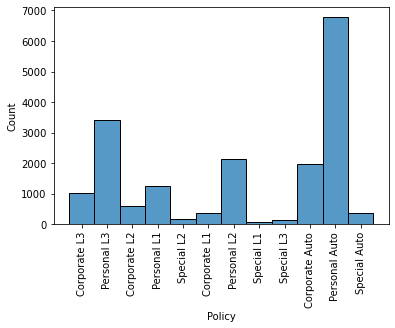

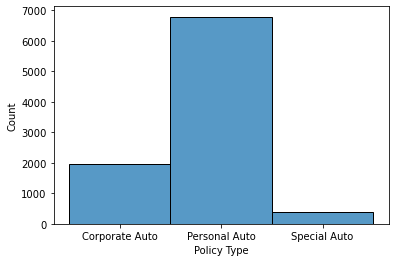

In [73]:
sns.histplot(customer_cat['Policy'])
sns.histplot(customer_cat['Policy Type'])
plt.xticks(rotation='vertical')
plt.show()

sns.histplot(customer_cat['Policy Type'])
plt.show()

#### Answer:



Column **Policy** reveales the information on the type of coverage. Here you see the information on Car Type, and Coverage combined. I assume that this will have to do with the coverage types: Basic, Extended, Premium. 


**NOTE** In addition the Policy Type Feature itsefl is represented in the feature Policy as we can see at the rigth 3 bars. 



Column **Policy Type** shows the type of car that is insured. 




### 9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

##### 1) Education

In [79]:
customer_cat['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Higher Eduction         1083
Name: Education, dtype: int64

In [80]:
customer_cat['Education'] = np.where(customer_cat['Education'].isin(['Master', 'Doctor']), 'Higher Eduction', customer_cat['Education'])

/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_51348/2425080356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_cat['Education'] = np.where(customer_cat['Education'].isin(['Master', 'Doctor']), 'Higher Eduction', customer_cat['Education'])


##### 2. EmploymentStatus

In [81]:
customer_df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [85]:
customer_df['EmploymentStatus'] = np.where(customer_df['EmploymentStatus'].isin(['Medical Leave', 'Disabled', 'Retired']), 'Other', customer_df['EmploymentStatus'])
customer_df['EmploymentStatus'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: EmploymentStatus, dtype: int64

##### 3. Policy

In [96]:
customer_cat['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [111]:
special = ['Special L1', 'Special L2', 'Special L3']
corp = ['Corporate L2', 'Corporate L1', 'Corporate L3']

def policy_clust(x):
            if x in special: 
                return 'Speial'
            elif x in corp: 
                return 'Corporate'
            else: 
                return x
        
customer_cat['Policy'] = customer_cat['Policy'].apply(policy_clust)
customer_cat['Policy'].value_counts()

/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_51348/1316969217.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_cat['Policy'] = customer_cat['Policy'].apply(policy_clust)


Personal L3    3426
Personal L2    2122
Corporate      1968
Personal L1    1240
Speial          378
Name: Policy, dtype: int64

##### 4. Vehicle Class

In [112]:
customer_cat['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [117]:
customer_cat['Vehicle Class'] = np.where(customer_cat['Vehicle Class'].isin(['Sports Car', 'Luxury SUV', 'Luxury Car']), 'Others', customer_cat['Vehicle Class'])
customer_cat['Vehicle Class'].value_counts()

/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_51348/1360090104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_cat['Vehicle Class'] = np.where(customer_cat['Vehicle Class'].isin(['Sports Car', 'Luxury SUV', 'Luxury Car']), 'Others', customer_cat['Vehicle Class'])


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Others            831
Name: Vehicle Class, dtype: int64